<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

## Problem Statement

Decide on your problem statement that will guide your analysis for this project. For guidelines, sample prompts, or inspiration, check out the README.

**To-Do:** I work for the college board and am advising where to allocate funds to states that have a declining participation rate in ACT/SAT

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)). The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). They have different score ranges, which you can read more about on their websites or additional outside sources (a quick Google search will help you understand the scores for each test):
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html)

Standardized tests have long been a controversial topic for students, administrators, and legislators. Since the 1940's, an increasing number of colleges have been using scores from sudents' performances on tests like the SAT and the ACT as a measure for college readiness and aptitude ([*source*](https://www.minotdailynews.com/news/local-news/2017/04/a-brief-history-of-the-sat-and-act/)). Supporters of these tests argue that these scores can be used as an objective measure to determine college admittance. Opponents of these tests claim that these tests are not accurate measures of students potential or ability and serve as an inequitable barrier to entry. Lately, more and more schools are opting to drop the SAT/ACT requirement for their Fall 2021 applications ([*read more about this here*](https://www.cnn.com/2020/04/14/us/coronavirus-colleges-sat-act-test-trnd/index.html)).

**To-Do:** My job is to identify which states have a decreasing average test score and how participation affects the decrease. I will pick which states need to loosen up their participation policy in order to increase average state test scores.

### Choose your Data

There are 10 datasets included in the [`data`](./data/) folder for this project. You are required to pick **at least two** of these to complete your analysis. Feel free to use more than two if you would like, or add other relevant datasets you find online.

* [`act_2017.csv`](./data/act_2017.csv): 2017 ACT Scores by State
* [`act_2018.csv`](./data/act_2018.csv): 2018 ACT Scores by State
* [`act_2019.csv`](./data/act_2019.csv): 2019 ACT Scores by State
* [`act_2019_ca.csv`](./data/act_2019_ca.csv): 2019 ACT Scores in California by School
* [`sat_2017.csv`](./data/sat_2017.csv): 2017 SAT Scores by State
* [`sat_2018.csv`](./data/sat_2018.csv): 2018 SAT Scores by State
* [`sat_2019.csv`](./data/sat_2019.csv): 2019 SAT Scores by State
* [`sat_2019_by_intended_college_major.csv`](./data/sat_2019_by_intended_college_major.csv): 2019 SAT Scores by Intended College Major
* [`sat_2019_ca.csv`](./data/sat_2019_ca.csv): 2019 SAT Scores in California by School
* [`sat_act_by_college.csv`](./data/sat_act_by_college.csv): Ranges of Accepted ACT & SAT Student Scores by Colleges

**To-Do:** *Fill out this cell with the datasets you will use for your analysis. Write a brief description of the contents for each dataset that you choose.*

### Outside Research

Based on your problem statement and your chosen datasets, spend some time doing outside research on state policies or additional information that might be relevant. Summarize your findings below. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. **Make sure that you cite your sources.**

**To-Do:** *Fill out this cell with outside research or any additional background information that will support your analysis.*

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [1]:
# Code:
def cal_mean(num):
    mean = sum(num)/len(num)
    return mean

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [2]:
# Code:
def standard_dev(num):
    mean = sum(num)/len(num)
    variance = sum(pow(i - mean,2) for i in num) / len(num)
    std = variance**0.5
    return std

3. Data cleaning function:
    
    Write a function that takes in a string that is a number and a percent symbol (ex. '50%', '30.5%', etc.) and converts this to a float that is the decimal approximation of the percent. For example, inputting '50%' in your function should return 0.5, '30.5%' should return 0.305, etc. Make sure to test your function to make sure it works!

You will use these functions later on in the project!

In [3]:
# Code:
def convert_to_float(string):
    if string.endswith('%'):
        string = string[:-1]
    decimal = float(string) / 100.0
    return decimal

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [4]:
# Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Import and Cleaning

### Data Import & Cleaning

Import the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary:
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values.
3. Check for any obvious issues with the observations (keep in mind the minimum & maximum possible values for each test/subtest).
4. Fix any errors you identified in steps 2-3.
5. Display the data types of each feature.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If your dataset has a column of percents (ex. '50%', '30.5%', etc.), use the function you wrote in Part 1 (coding challenges, number 3) to convert this to floats! *Hint*: use `.map()` or `.apply()`.
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

In [114]:
# Code: Display Data
v_2017 = '../data/sat_2017.csv'
v_2018 = '../data/sat_2018.csv'
v_2019 = '../data/sat_2019.csv'
df = pd.read_csv(v_2017)
df2 = pd.read_csv(v_2018)
df3 = pd.read_csv(v_2019)

sat_2017 = pd.read_csv('../data/sat_2017.csv')

In [507]:
df.head()

,state,participation,total
0,Alabama,0.05,1165
1,Alaska,0.38,1080
2,Arizona,0.30,1116
3,Arkansas,0.03,1208
4,California,0.53,1055


In [509]:
df2.head()

,state,participation,total
0,Alabama,0.06,1166
1,Alaska,0.43,1106
2,Arizona,0.29,1149
3,Arkansas,0.05,1169
4,California,0.60,1076


In [510]:
df3.head()

,state,participation,total
0,Alabama,0.07,1143
1,Alaska,0.41,1097
2,Arizona,0.31,1134
3,Arkansas,0.06,1141
4,California,0.63,1065


In [511]:
# Check for missing values
df.isnull().sum()

state            0
participation    0
total            0
dtype: int64

In [512]:
df2.isnull().sum()

state            0
participation    0
total            0
dtype: int64

In [513]:
df3.isnull().sum()

state            0
participation    0
total            0
dtype: int64

In [7]:
# Fix the errors identified above

In [8]:
# Display data types
df.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [9]:
df2.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [10]:
df3.dtypes

State                 object
Participation Rate    object
EBRW                   int64
Math                   int64
Total                  int64
dtype: object

In [115]:
# Drop unneccesary rows (maybe reading & math)
df.drop(columns=['Evidence-Based Reading and Writing'], inplace=True)
df.drop(columns=['Math'], inplace=True)

df2.drop(columns=['Evidence-Based Reading and Writing'], inplace=True)
df2.drop(columns=['Math'], inplace=True)

df3.drop(columns=['EBRW'], inplace=True)
df3.drop(columns=['Math'], inplace=True)

In [116]:
new_columns_dict3 = { # only applies to df3 since df3 Participation is renamed to PR
    'State': 'state',
    'Participation Rate': 'participation',
    'Total': 'total',
}

In [117]:
# Rename columns to all lowercase, no spaces
new_columns_dict = {
    'State': 'state',
    'Participation': 'participation',
    'Total': 'total',
}

df.rename(columns=new_columns_dict, inplace=True)
df2.rename(columns=new_columns_dict, inplace=True)
df3.rename(columns=new_columns_dict3, inplace=True)

In [118]:
# Check for obvious issues

# Data Frame 3 2019 SAT has 2 extra rows
# Need to remove Virgin Islands and Puerto Rico

# Fixed.
zero_par = df3[(df3['participation'] == '—')].index
df3.drop(zero_par, inplace = True)

In [119]:
# Fix incorrect data types (Participation)
df.participation = df.participation.apply(convert_to_float)
df2.participation = df2.participation.apply(convert_to_float)

In [120]:
df3.participation = df3.participation.apply(convert_to_float)

In [17]:
# merge dataframes
merged = [df, df2, df3]
data_final = pd.concat(merged)

In [46]:
# Save as .csv files #PROBLEM1
data_final.to_csv("../data/data_sat_final.csv", index = False)

In [233]:
data_final.head()

,state,participation,total
0,Alabama,0.05,1165
1,Alaska,0.38,1080
2,Arizona,0.30,1116
3,Arkansas,0.03,1208
4,California,0.53,1055


### Data Dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

*Note*: if you are unsure of what a feature is, check the source of the data! This can be found in the README.

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**participation_roc**|*float*|SAT (2017, 2018, 2019) |The percentage of change in participation rate from years 2017 to 2019 per state (units 0.35 = 35% positive change; -0.09 = 9% negative change).| 
|**total_score_roc**|*float*|SAT (2017, 2018, 2019)|The percentage of change in total score per state from years 2017 to 2019 per state (units 0.35 = 35% positive change; -0.09 = 9% negative change).|
|**state**|*string*|SAT (2017, 2018, 2019)|The state which showcases participation rate and totals.| 
|**participation**|*float*|SAT (2017, 2018, 2019)|The rate of participation for all students in given state for the SAT (units percent 0.98 = 98%).| 
|**total**|*int*|SAT (2017, 2018, 2019)|The total average score for all students who took the SAT in given state (units 1030 = average score)| 


## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which states have the highest and lowest participation rates for the 2017, 2019, or 2019 SAT and ACT?
        - Which states have the highest and lowest mean total/composite scores for the 2017, 2019, or 2019 SAT and ACT?
        - Do any states with 100% participation on a given test have a rate change year-to-year?
        - Do any states show have >50% participation on *both* tests each year?
        - Which colleges have the highest median SAT and ACT scores for admittance?
        - Which California school districts have the highest and lowest mean test scores?
    - **You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [2]:
data_final.describe

NameError: name 'data_final' is not defined

In [439]:
# Data set that holds average of participation rate per state in SAT years 2017-2019
data_part = data_final.groupby('state')['participation'].mean()
data_part

state
Alabama                 0.060000
Alaska                  0.406667
Arizona                 0.300000
Arkansas                0.046667
California              0.586667
Colorado                0.703333
Connecticut             1.000000
Delaware                1.000000
District of Columbia    0.953333
Florida                 0.796667
Georgia                 0.673333
Hawaii                  0.550000
Idaho                   0.976667
Illinois                0.693333
Indiana                 0.640000
Iowa                    0.026667
Kansas                  0.040000
Kentucky                0.040000
Louisiana               0.043333
Maine                   0.976667
Maryland                0.756667
Massachusetts           0.790000
Michigan                1.000000
Minnesota               0.036667
Mississippi             0.026667
Missouri                0.036667
Montana                 0.096667
Nebraska                0.030000
Nevada                  0.230000
New Hampshire           0.956667
New 

Connecticut and Delaware actually have a 100% participation rate through 2017 - 2019

In [440]:
# Data set that holds average of total score per state in SAT years 2017-2019
data_total = data_final.groupby('state')['total'].mean()
data_total

state
Alabama                 1158.000000
Alaska                  1094.333333
Arizona                 1133.000000
Arkansas                1172.666667
California              1065.333333
Colorado                1083.333333
Connecticut             1046.666667
Delaware                 993.000000
District of Columbia     967.333333
Florida                 1038.333333
Georgia                 1057.333333
Hawaii                  1065.000000
Idaho                    999.666667
Illinois                1049.000000
Indiana                 1076.000000
Iowa                    1261.333333
Kansas                  1255.333333
Kentucky                1242.333333
Louisiana               1202.666667
Maine                   1012.666667
Maryland                1066.000000
Massachusetts           1117.333333
Michigan                1006.333333
Minnesota               1292.333333
Mississippi             1238.333333
Missouri                1256.333333
Montana                 1197.666667
Nebraska              

In [474]:
# Rate of Change (%) function
def rate_of_change(old_num, new_num):
    r = (new_num - old_num)/(old_num)
    return r

In [475]:
# Dataframe that contains participation rate per state for 2017
df_p_low = df.groupby('state')['participation'].mean()
# Dataframe that contains participation rate per state for 2019
df_p_new = df3.groupby('state')['participation'].mean()

In [476]:
# Dataframe that contains total score per state for 2017
df_t_low = df.groupby('state')['total'].mean()
# Dataframe that contains total score per state for 2019
df_t_new = df3.groupby('state')['total'].mean()

In [477]:
# Created a dataframe that holds participation for year 2017 and 2019
df_p_roc = pd.concat([df_p_low, df_p_new], axis = 1)

In [478]:
# created a variable that holds total for year 2017, 2019
df_t_roc = pd.concat([df_t_low, df_t_new], axis = 1)

In [479]:
# Rename columns in participation to match year
df_p_roc.columns = ['par_2017', 'par_2019']

In [480]:
# Rename columns in total score to match year
df_t_roc.columns = ['tot_2017', 'tot_2019']

In [481]:
# Add another column to participation df that shows rate of change with function (rate_of_change)
df_p_roc['rate_of_change'] = rate_of_change(df_p_roc['par_2017'], df_p_roc['par_2019'])
df_p_roc.head()

,par_2017,par_2019,rate_of_change
state,,,
Alabama,0.05,0.07,0.400000
Alaska,0.38,0.41,0.078947
Arizona,0.30,0.31,0.033333
Arkansas,0.03,0.06,1.000000
California,0.53,0.63,0.188679


In [482]:
df_p_roc.head()

,par_2017,par_2019,rate_of_change
state,,,
Alabama,0.05,0.07,0.400000
Alaska,0.38,0.41,0.078947
Arizona,0.30,0.31,0.033333
Arkansas,0.03,0.06,1.000000
California,0.53,0.63,0.188679


In [483]:
# Add another column to total df that shows rate of change with def(rate_of_change)
df_t_roc['rate_of_change'] = rate_of_change(df_t_roc['tot_2017'], df_t_roc['tot_2019'])
df_t_roc.head()

,tot_2017,tot_2019,rate_of_change
state,,,
Alabama,1165.0,1143.0,-0.018884
Alaska,1080.0,1097.0,0.015741
Arizona,1116.0,1134.0,0.016129
Arkansas,1208.0,1141.0,-0.055464
California,1055.0,1065.0,0.009479


In [484]:
# Create a dataframe that shows state and rate of change in total
df_rate_changes = df_t_roc.groupby('state')['rate_of_change'].mean()
df_rate_changes.head()

state
Alabama      -0.018884
Alaska        0.015741
Arizona       0.016129
Arkansas     -0.055464
California    0.009479
Name: rate_of_change, dtype: float64

In [485]:
# Add participation rate of change to the dataframe
df_rate_changes = pd.concat([df_rate_changes, df_p_roc], axis = 1)
df_rate_changes

,rate_of_change,par_2017,par_2019,rate_of_change
state,,,,
Alabama,-0.018884,0.05,0.07,0.400000
Alaska,0.015741,0.38,0.41,0.078947
Arizona,0.016129,0.30,0.31,0.033333
Arkansas,-0.055464,0.03,0.06,1.000000
California,0.009479,0.53,0.63,0.188679
Colorado,-0.147377,0.11,1.00,8.090909
Connecticut,0.004803,1.00,1.00,0.000000
Delaware,-0.011044,1.00,1.00,0.000000
District of Columbia,0.026316,1.00,0.94,-0.060000


In [486]:
# Delete extra column
df_rate_changes.drop('par_2017', axis=1, inplace=True)

In [487]:
# Delete extra column
df_rate_changes.drop('par_2019', axis=1, inplace=True)

In [488]:
# Rename columns in rate changes to match participation or total
df_rate_changes.columns = ['total_score_roc', 'participation_roc']

In [489]:
# Sort by highest total score change AND increasing participation from 2017 to 2019
df_rate_changes['total_score_roc'].sort_values().head()

state
Colorado        -0.147377
West Virginia   -0.131676
Illinois        -0.091480
Oklahoma        -0.080229
Rhode Island    -0.063089
Name: total_score_roc, dtype: float64

These states are the worth performing states...

In [490]:
# Sort by lowest total score change AND decreasing participation from 2017 to 2019
df_rate_changes.sort_values('participation_roc', ascending = False)

,total_score_roc,participation_roc
state,,
Illinois,-0.091480,10.111111
Colorado,-0.147377,8.090909
West Virginia,-0.131676,6.071429
Oklahoma,-0.080229,2.142857
Arkansas,-0.055464,1.000000
New Mexico,-0.057118,0.636364
Ohio,-0.045257,0.583333
Iowa,-0.024314,0.500000
Mississippi,-0.004026,0.500000


These states also happen to have increasing participation rates...

When I scroll down, I notice there are only 5 states with a negative participation rate change. Those actually have a slightly increasing total score rate of change. So they are performing exceptional.

In [491]:
df_rate_changes.sort_values('total_score_roc')

,total_score_roc,participation_roc
state,,
Colorado,-0.147377,8.090909
West Virginia,-0.131676,6.071429
Illinois,-0.091480,10.111111
Oklahoma,-0.080229,2.142857
Rhode Island,-0.063089,0.408451
New Mexico,-0.057118,0.636364
Arkansas,-0.055464,1.000000
Ohio,-0.045257,0.583333
South Carolina,-0.031955,0.360000


In [495]:
# All negative rate of change test scores
df_roc_neg_score = df_rate_changes.loc[df_rate_changes['total_score_roc'] < 0, :]

In [493]:
# All positive rate of change test scores
df_roc_pos_score = df_rate_changes.loc[df_rate_changes['total_score_roc'] > 0, :]

# Had a problem putting this info into a bar chart sadly. Waste of time.

Assign the output to variable sd as a dictionary where:
Each column name is now a key
That standard deviation of the column is the value

In [382]:
sd = {column.name:standard_dev(column) for column in [df[i] for i in df if (df[i].dtype=='float64') | (df[i].dtype=='int64')]}

In [383]:
sd

{'participation': 0.3492907076664507, 'total': 91.58351056778743}

Average Participation Rate, Average Total Score in the entire US for 2017

In [384]:
state_pmean = {column.name:cal_mean(column) for column in [df[i] for i in df if (df[i].dtype=='float64') | (df[i].dtype=='int64')]}

In [385]:
state_pmean

{'participation': 0.39803921568627454, 'total': 1126.0980392156862}

Average Participation Rate, Average Total Score in the entire US for 2018

In [386]:
state_pmean2 = {column.name:cal_mean(column) for column in [df2[i] for i in df2 if (df2[i].dtype=='float64') | (df2[i].dtype=='int64')]}

In [387]:
state_pmean2

{'participation': 0.45745098039215676, 'total': 1120.0196078431372}

Average Participation Rate, Average Total Score in the entire US for 2019

In [388]:
state_pmean3 = {column.name:cal_mean(column) for column in [df3[i] for i in df3 if (df3[i].dtype=='float64') | (df3[i].dtype=='int64')]}

In [84]:
state_pmean3

{'participation': 0.49058823529411755, 'total': 1113.078431372549}

**To-Do:** *Edit this cell with your findings on trends in the data (step 3 above).*

- As participation went up for the SAT over the years, total average score went down

- The top states that had a increasing participation rate AND increasing average score over the years were: 'New Jersey, North Carolina, Arizona, Alaska, Virginia, Massachusetts, New York'

- There were only 5 states that had a decreasing participation rate: 'Nevada, Montana, DOC, Hawaii, New Hampshire' and they all had a positive increase in total scores

- So no states had a decreasing participation rate AND decreasing average score!!!

- The states that increased the average score the most were: 'South Dakota, Nevada, New Jersey, DOC, North Carolina' and they had a net steady participation rate

- The states that decreased the average score the most were: 'Colorado, West Virginia, Illinois, Oklahoma, Rhode Island' and they had a increasing participation rate

## Visualize the Data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers. It is important to not only create visualizations, but to **interpret your visualizations** as well.

**Every plot should**:
- Have a title
- Have axis labels
- Have appropriate tick labels
- Text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Have an interpretation to aid understanding

Here is an example of what your plots should look like following the above guidelines. Note that while the content of this example is unrelated, the principles of visualization hold:

![](https://snag.gy/hCBR1U.jpg)
*Interpretation: The above image shows that as we increase our spending on advertising, our sales numbers also tend to increase. There is a positive correlation between advertising spending and sales.*

---

Here are some prompts to get you started with visualizations. Feel free to add additional visualizations as you see fit:
1. Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.
    - Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).
    - Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).
2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
    - *OPTIONAL*: Summarize the underlying distributions of your features (in words & statistics)
         - Be thorough in your verbal description of these distributions.
         - Be sure to back up these summaries with statistics.
         - We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? Explain your answers for each distribution and how you think this will affect estimates made from these data.
3. Plot and interpret boxplots. 
    - Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
    - Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
    - Each boxplot should:
        - Only include variables of a similar scale
        - Have clear labels for each variable
        - Have appropriate titles and labels
4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
    - Your plots should have:
        - Two clearly labeled axes
        - A proper title
        - Colors and symbols that are clear and unmistakable
5. Additional plots of your choosing.
    - Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

In [235]:
# Use Seaborn's heatmap with pandas .corr() to visualize correlations between all numeric features.\
df_rate_changes.corr()

,total_score_roc,participation_roc
total_score_roc,1.000000,-0.791569
participation_roc,-0.791569,1.000000


Text(0.5, 0.01, 'Interpretation: As participation rate decreased throughout the years, total scores decreased.')

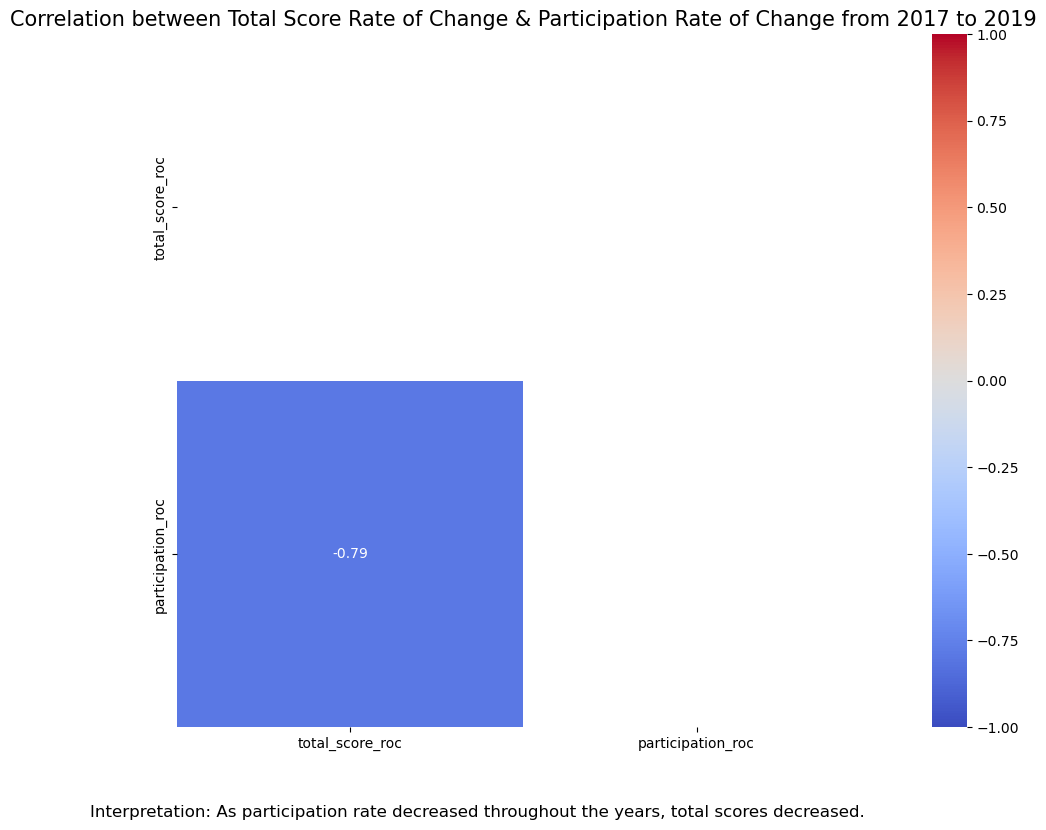

In [277]:
# Establish size of figure.
plt.figure(figsize = (16,9))
plt.title('Correlation between Total Score Rate of Change & Participation Rate of Change from 2017 to 2019', fontsize = 15)

# Get correlation of variables.
corr = df_rate_changes.corr()

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap, while masking the upper triangle to be white.
sns.heatmap(corr, mask = mask, square = True, cmap = 'coolwarm', annot = True, vmin = -1, vmax = 1);

txt="Interpretation: As participation rate decreased throughout the years, total scores decreased."
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)


# source: https://stackoverflow.com/questions/34010205/adding-caption-below-x-axis-for-a-scatter-plot-using-matplotlib

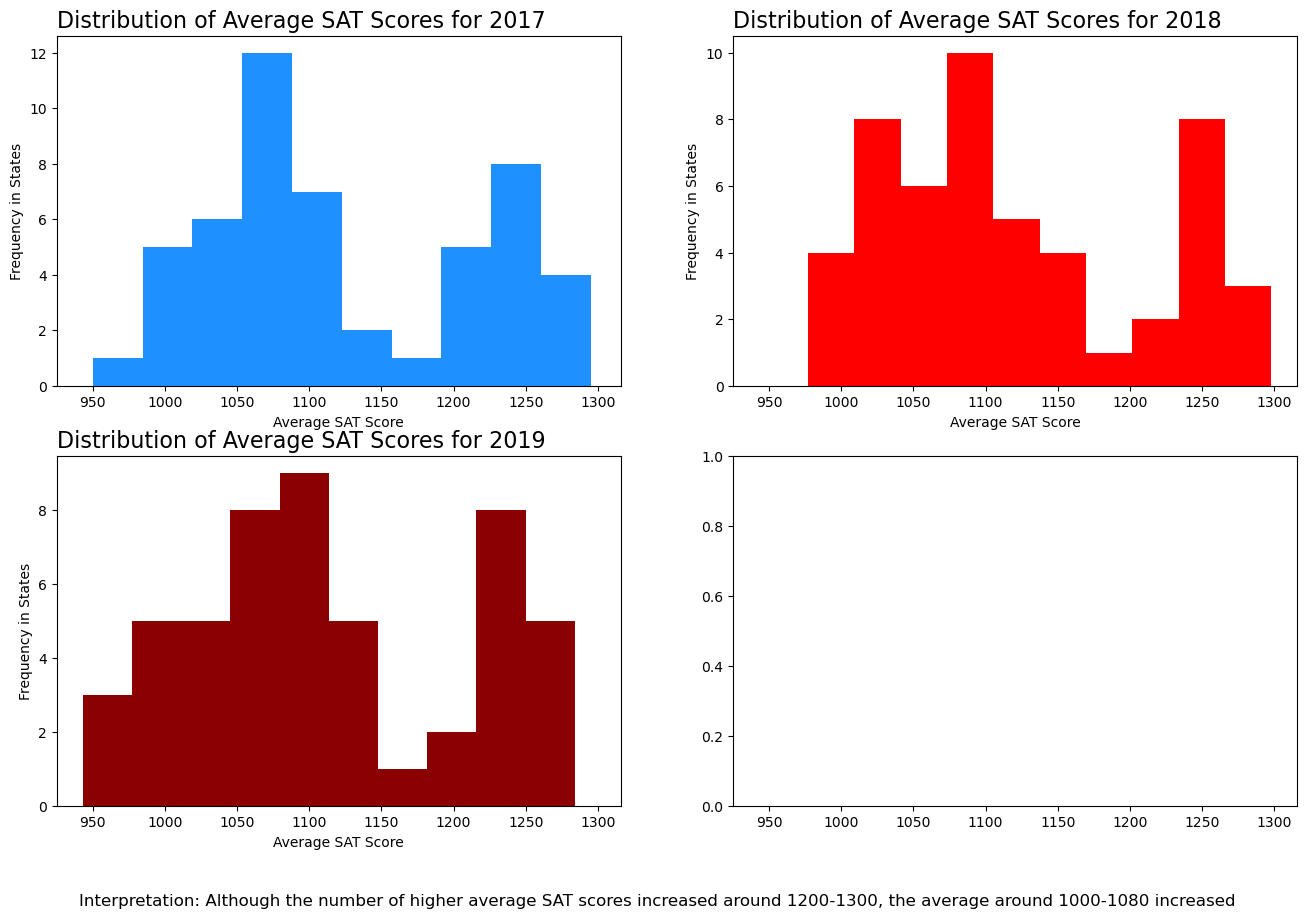

In [498]:
fig, ax = plt.subplots(2, 2, figsize=(16, 10), sharex=True)

# First determine an axis to operatoe on and then create the plot!
ax[0][0].hist(df['total'], color='dodgerblue')
ax[0][0].set_title('Distribution of Average SAT Scores for 2017', size=16, loc='left')
ax[0][0].set_xlabel("Average SAT Score")
ax[0][0].set_ylabel("Frequency in States")
ax[0][0].tick_params(labelbottom=True)

# We can do this for all the other stocks!
ax[0][1].hist(df2['total'], color='red')
ax[0][1].set_title('Distribution of Average SAT Scores for 2018', size=16, loc='left')
ax[0][1].set_xlabel("Average SAT Score")
ax[0][1].set_ylabel("Frequency in States")
ax[0][1].tick_params(labelbottom=True)

ax[1][0].hist(df3['total'], color='darkred')
ax[1][0].set_title('Distribution of Average SAT Scores for 2019', size=16, loc='left')
ax[1][0].set_xlabel("Average SAT Score")
ax[1][0].set_ylabel("Frequency in States")


txt="Interpretation: Although the number of higher average SAT scores increased around 1200-1300, the average around 1000-1080 increased"
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12);

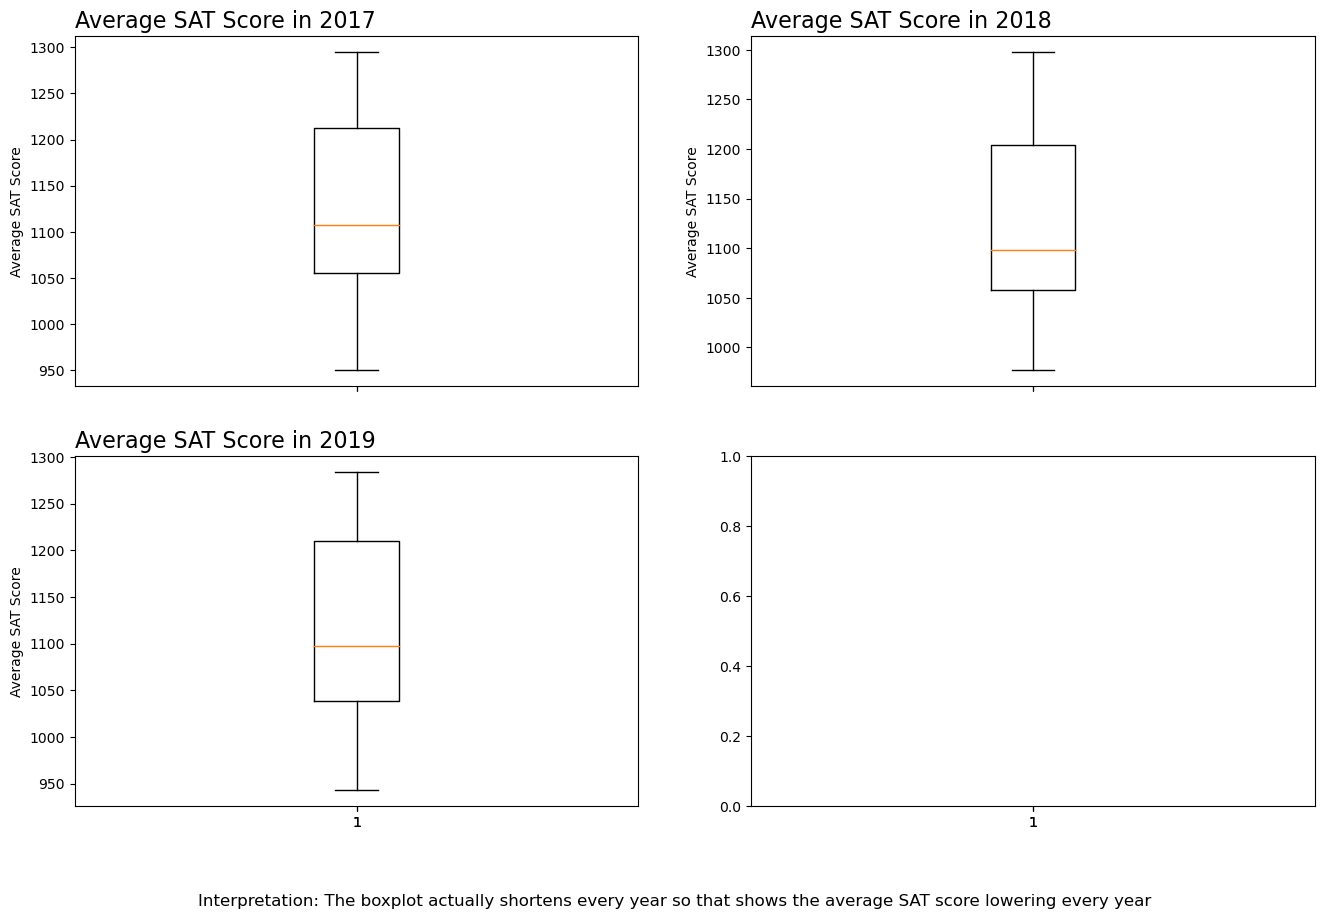

In [499]:
fig, axs = plt.subplots(2, 2, figsize=(16, 10), sharex=True)

# First determine an axis to operatoe on and then create the plot!
axs[0][0].boxplot(df['total'])
axs[0][0].set_title('Average SAT Score in 2017', size=16, loc='left')
axs[0][0].set_ylabel("Average SAT Score")

# We can do this for all the other stocks!
axs[0][1].boxplot(df2['total'])
axs[0][1].set_title('Average SAT Score in 2018', size=16, loc='left')
axs[0][1].set_ylabel("Average SAT Score")

axs[1][0].boxplot(df3['total'])
axs[1][0].set_title('Average SAT Score in 2019', size=16, loc='left')
axs[1][0].set_ylabel("Average SAT Score")


# sns.boxplot(data_final.participation);
txt="Interpretation: The boxplot actually shortens every year so that shows the average SAT score lowering every year"
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12);

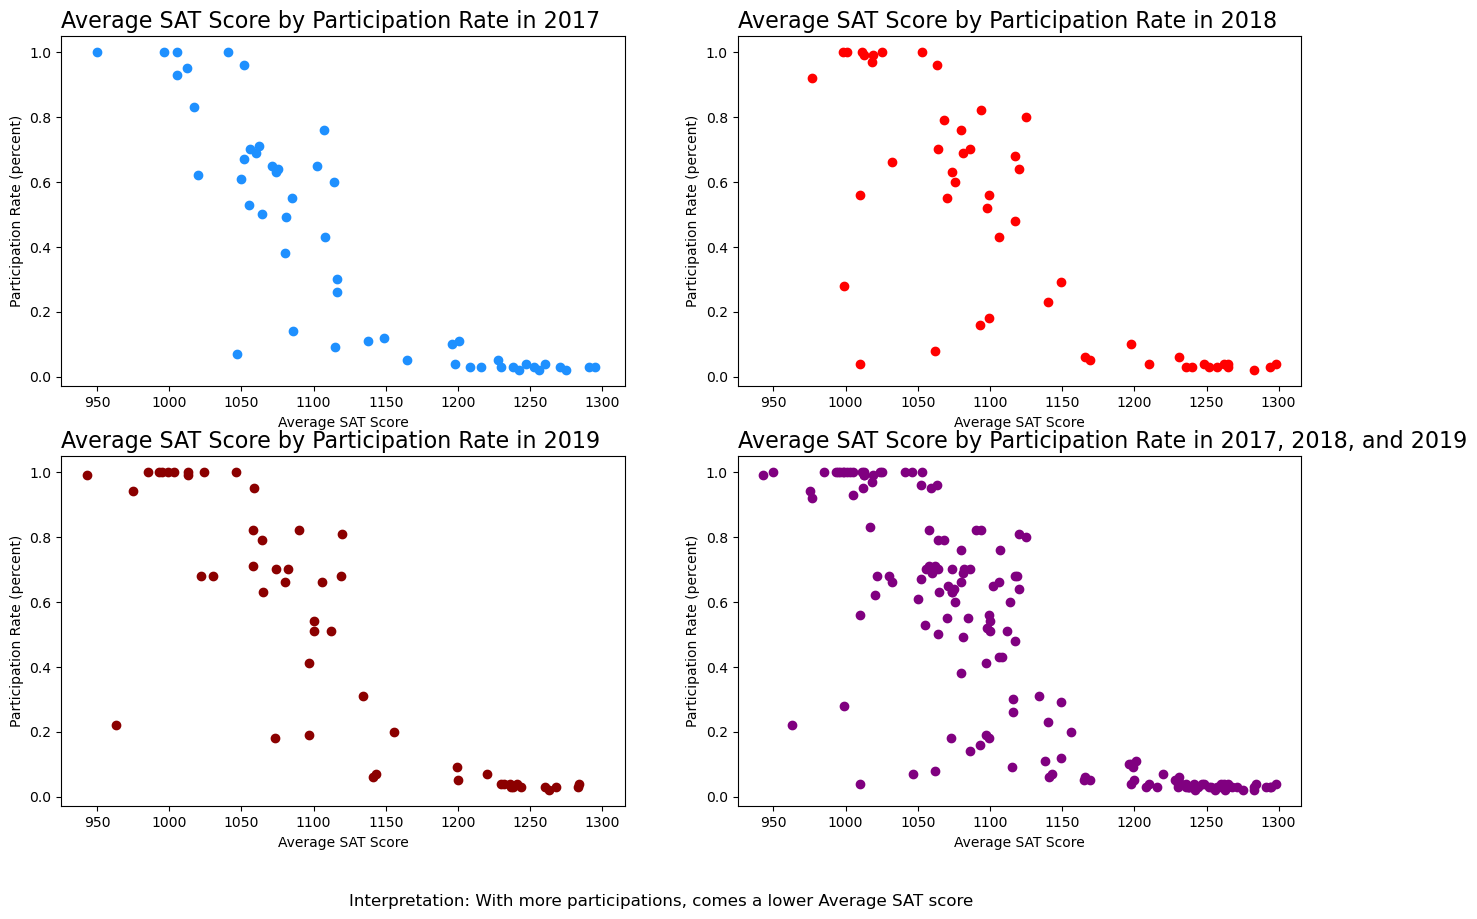

In [468]:
fig, axs = plt.subplots(2, 2, figsize=(16, 10), sharex=True)

# First determine an axis to operatoe on and then create the plot!
axs[0][0].scatter(df['total'], df['participation'], color='dodgerblue')
axs[0][0].set_title('Average SAT Score by Participation Rate in 2017', size=16, loc='left')
axs[0][0].set_xlabel("Average SAT Score")
axs[0][0].set_ylabel("Participation Rate (percent)")
axs[0][0].tick_params(labelbottom=True)

# We can do this for all the other stocks!
axs[0][1].scatter(df2['total'], df2['participation'], color='red')
axs[0][1].set_title('Average SAT Score by Participation Rate in 2018', size=16, loc='left')
axs[0][1].set_xlabel("Average SAT Score")
axs[0][1].set_ylabel("Participation Rate (percent)")
axs[0][1].tick_params(labelbottom=True)

axs[1][0].scatter(df3['total'], df3['participation'], color='darkred')
axs[1][0].set_title('Average SAT Score by Participation Rate in 2019', size=16, loc='left')
axs[1][0].set_xlabel("Average SAT Score")
axs[1][0].set_ylabel("Participation Rate (percent)")

axs[1][1].scatter(data_final['total'], data_final['participation'], color='purple')
axs[1][1].set_title('Average SAT Score by Participation Rate in 2017, 2018, and 2019', size=16, loc='left');
axs[1][1].set_xlabel("Average SAT Score")
axs[1][1].set_ylabel("Participation Rate (percent)")

txt="Interpretation: With more participations, comes a lower Average SAT score"
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12);

C:\Users\tu\AppData\Local\Temp\ipykernel_18364\2603677925.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()])


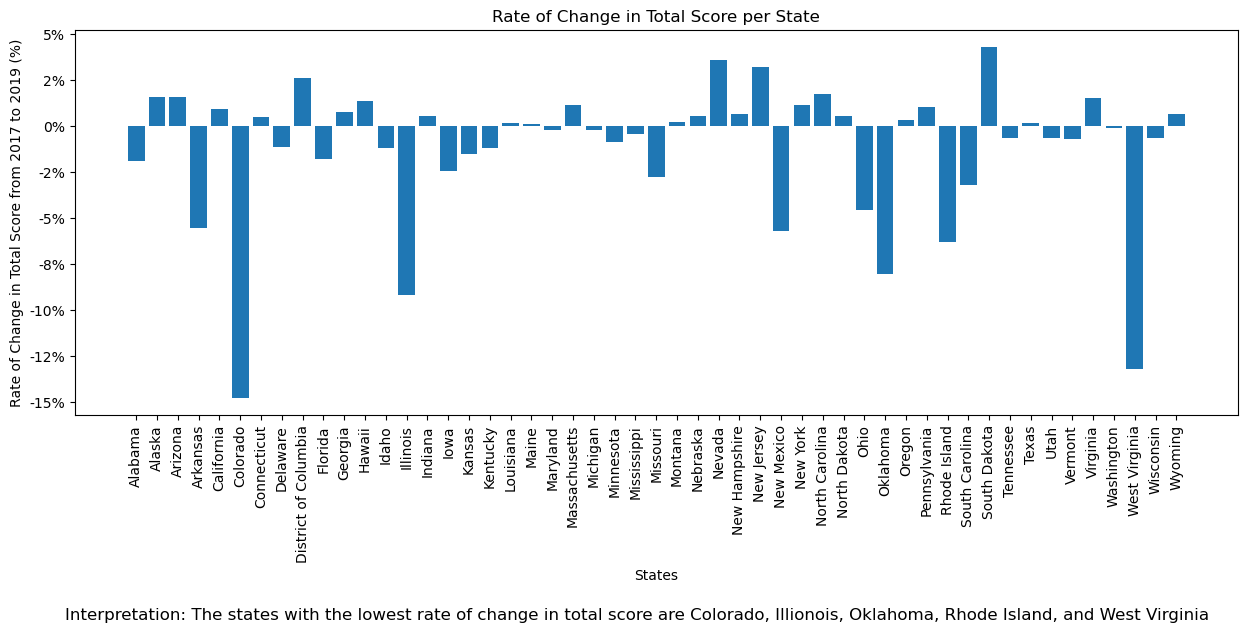

In [506]:
# Plot it! Let's use a bar chart to visualize the top 10 most sugary cereals

# Size
plt.figure(figsize = (15, 5))

# Bar chart df[df.columns[0]]
plt.bar(df['state'], df_rate_changes['total_score_roc']) # colors: https://matplotlib.org/stable/gallery/color/named_colors.html

# Create a descriptive title
plt.title('Rate of Change in Total Score per State')

# Rotate text
plt.xticks(rotation = 90)
# plt.yticks(labels['{:,.2%}'.format(x) for x in vals])
plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()]) 

# source: https://stackoverflow.com/questions/31357611/format-y-axis-as-percent

# Add axis labels
plt.xlabel('States')
plt.ylabel('Rate of Change in Total Score from 2017 to 2019 (%)'); # semicolon suppresses text output

txt="Interpretation: The states with the lowest rate of change in total score are Colorado, Illionois, Oklahoma, Rhode Island, and West Virginia"
plt.figtext(.5, -0.3, txt, wrap=True, horizontalalignment='center', fontsize=12);

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Make sure to answer your question of interest or address your problem statement here.

**To-Do:** 

The biggest takeaway is as participation goes up, average score decreases. My job is to identify which states have a decreasing average test score and how participation affects the decrease. The states that need to loosen up their participation policy in order to increase average state test scores are Colorado, Illionois, Oklahoma, Rhode Island, and West Virginia. They clearly have the highest decline in average total score. These states also coincidentally have a positive participation rate of change from 2017 to 2019. This can be found in "df_rate_changes.sort_values('total_score_roc')" I recommend these states tighten up on who can take the SAT and not waste paper. Whereas the only states with negative participation rates are actually performing exceptionally well in the SAT's.

Don't forget to create your README!

**To-Do:** *If you combine your problem statement, data dictionary, brief summary of your analysis, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.* Don't forget to cite your data sources!